In [7]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

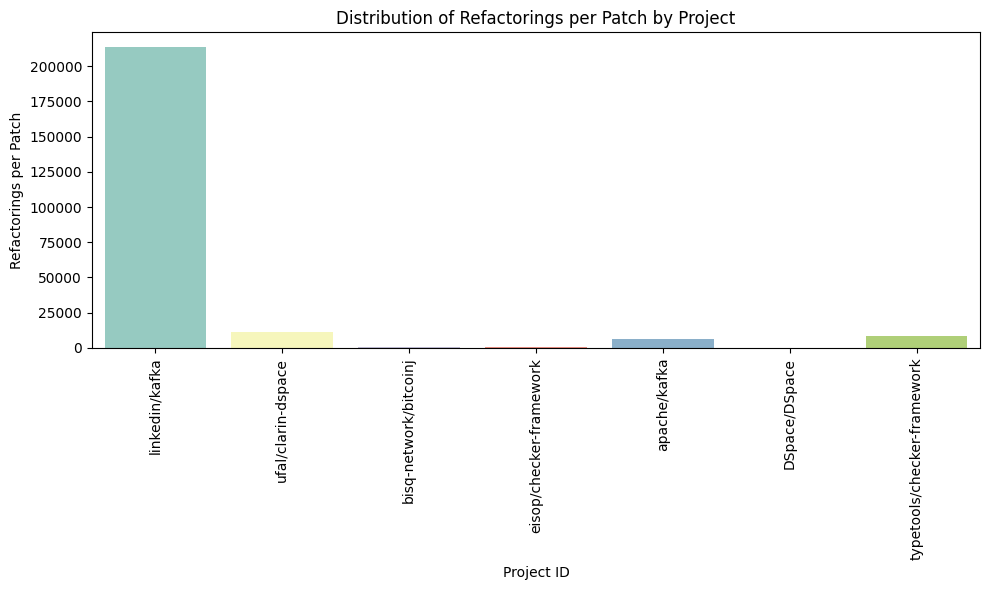

In [ ]:
# Load your CSV
df = pd.read_csv("analysis/refactorings_project.csv", on_bad_lines="skip")  # replace with your actual file path

# Group by project and patch to count refactorings per patch
grouped = df.groupby(['project_id']).size().reset_index(name='refactoring_count')

# Optional: map project_id to names if you have a lookup
grouped['project_name'] = grouped['project_id'].map({1: 'linkedin/kafka', 14: 'ufal/clarin-dspace', 15: 'bisq-network/bitcoinj', 18: 'eisop/checker-framework', 21: 'apache/kafka', 22: 'DSpace/DSpace', 25: 'typetools/checker-framework'})

# Boxplot: distribution of refactoring counts per patch per project
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='project_name', y='refactoring_count', data=grouped, palette='Set3')
ax.tick_params(axis='x', labelrotation=90)
plt.xlabel('Project ID')
plt.ylabel('Refactorings per Patch')
plt.title('Distribution of Refactorings per Patch by Project')
plt.tight_layout()
plt.show()

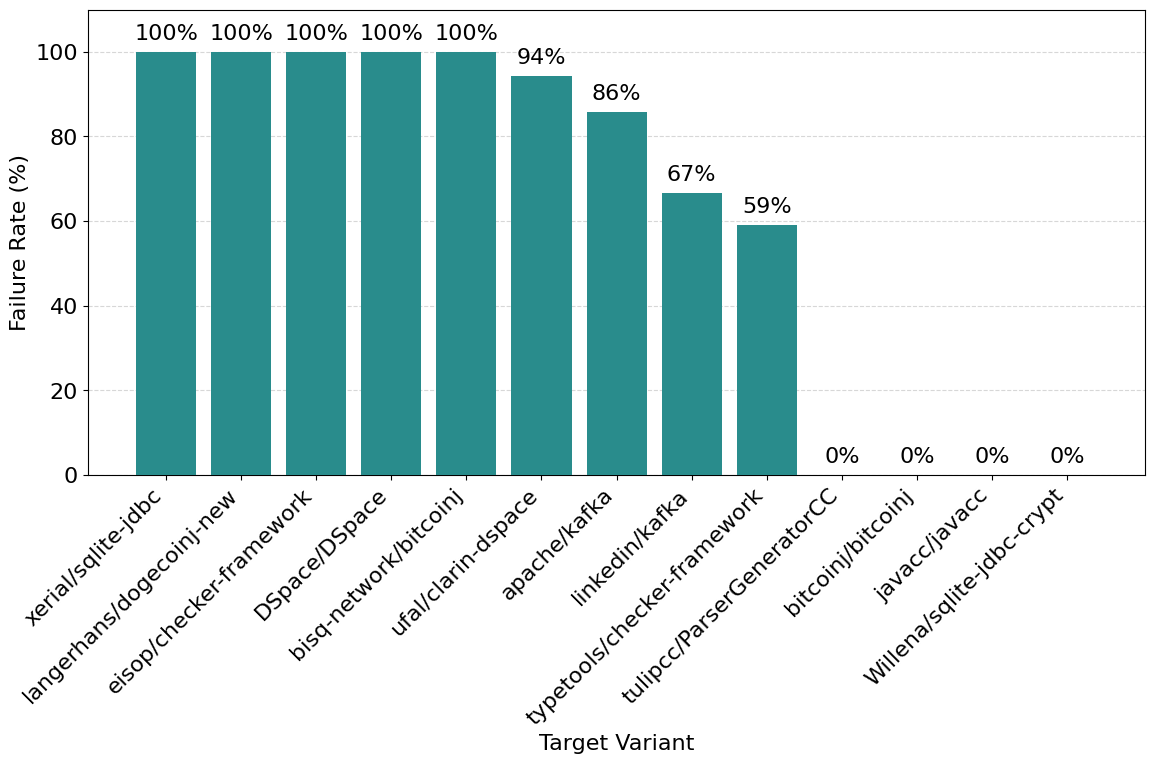

In [25]:

data = {
    "Variant Pair": [
        "xerial/sqlite-jdbc","langerhans/dogecoinj-new", "eisop/checker-framework","DSpace/DSpace", "bisq-network/bitcoinj", "ufal/clarin-dspace", "apache/kafka", "linkedin/kafka", "typetools/checker-framework",
          "tulipcc/ParserGeneratorCC", "bitcoinj/bitcoinj", "javacc/javacc", "Willena/sqlite-jdbc-crypt"
    ],
    "Failure Rate (%)": [100, 100, 100, 100, 100, 94.3, 85.7,66.7, 59.0, 0.0, 0.0, 0.0, 0.0]
}

df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(12, 8))
bars = plt.bar(df["Variant Pair"], df["Failure Rate (%)"], color="#298C8C", zorder=3)

# Customize labels and layout
# plt.ylabel("Failure Rate (%)")
plt.xticks(rotation=45, ha="right")
# plt.title("Cherry-Pick Failure Rates Across Variant Pairs")

# Add padding for labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 2, f'{height:.0f}%', ha='center', va='bottom', fontsize=16)

plt.ylim(0, max(df["Failure Rate (%)"]) + 10)  # Add vertical padding
plt.ylabel('Failure Rate (%)', fontsize=16)
plt.xlabel('Target Variant', fontsize=16)
plt.tick_params(axis="y", labelsize=16)
plt.xticks(rotation=45, fontsize=16)

plt.grid(True, axis='y', linestyle="--", alpha=0.5, zorder=0)
plt.tight_layout(pad=2.0)  # Extra space around figure
# plt.savefig("failure_rates.pdf", dpi=1200)
plt.show()

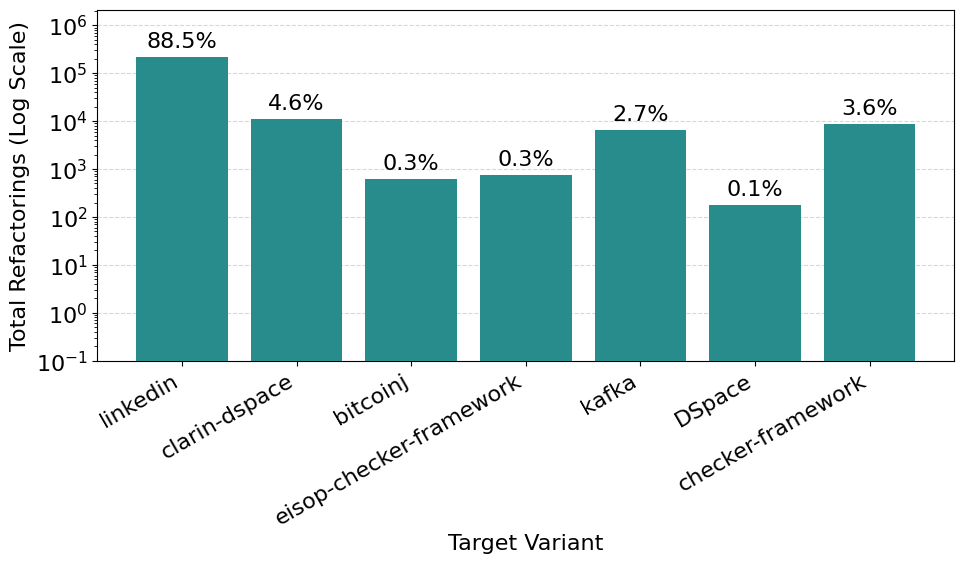

In [27]:
# Data
data = {
    "Project": [
        "linkedin",
        "clarin-dspace",
        "bitcoinj",
        "eisop-checker-framework",
        "kafka",
        "DSpace",
        "checker-framework"
    ],
    "Refactorings": [213260, 11039, 613, 734, 6543, 181, 8598]  # use 0.1 to allow log scale
}

df = pd.DataFrame(data)
total = df["Refactorings"].sum()
df["Percentage"] = df["Refactorings"] / total * 100

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(df["Project"], df["Refactorings"], color="#298C8C", zorder=3)

# Annotate bars with percentage
for bar, pct in zip(bars, df["Percentage"]):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height * 1.3,
        f"{pct:.1f}%",
        ha="center",
        va="bottom",
        fontsize=16,
        color='black',
    )

# Axis settings
plt.yscale("log")
plt.ylim(1e-1, df["Refactorings"].max() * 10)
plt.ylabel("Total Refactorings (Log Scale)", fontsize=16)
plt.xlabel("Target Variant", fontsize=16)
# plt.title("Total Refactorings by Project (Log Scale)", fontsize=16)
plt.xticks(rotation=30, ha="right", fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, axis='y', linestyle="--", alpha=0.5,zorder=0)

# Final layout
plt.tight_layout(pad=2)
# plt.savefig("refactoring-induced-failure.pdf", dpi=1200)
plt.show()

**RQ3:** Top 5 refactoring types associated with cherry-pick failures, grouped by refactoring type (X-axis) and target variant (legend). Y-axis uses a log scale to normalize project size variability and improve comparability across targets.

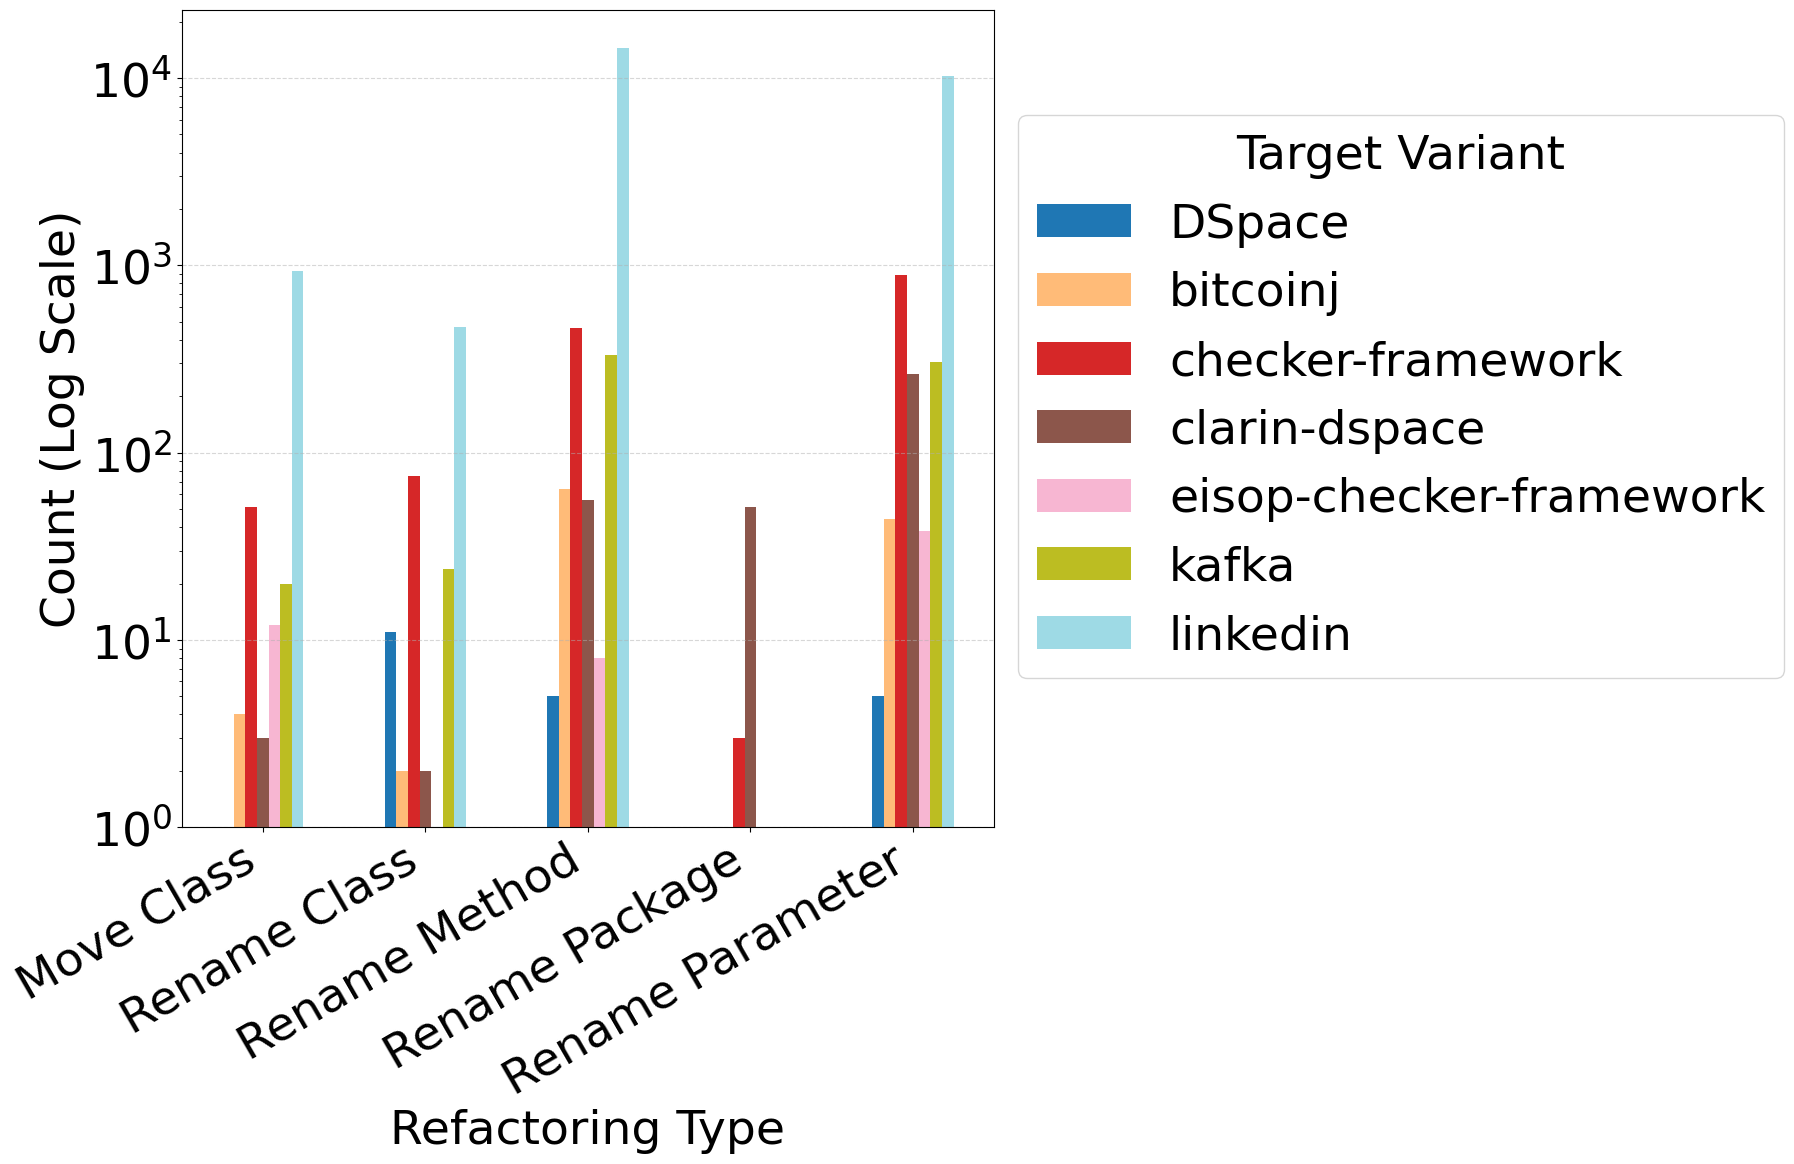

In [29]:
df = pd.read_csv("analysis/refactorings_project.csv")

# Format refactoring_type
df['refactoring_type'] = df['refactoring_type'].str.replace('_', ' ').str.title()

# Identify top 5 refactorings
top_refactorings = df['refactoring_type'].value_counts().nlargest(7).index

# Filter the DataFrame
df_top = df[df['refactoring_type'].isin(top_refactorings)]

# Create crosstab
# plot_data = pd.crosstab(df_top['refactoring_type'], df_top['fork_name'])

# Define the list of interest for filtering
refactoring_interest = [
    "RenameMethod", "MoveMethod", "Move&RenameMethod", "RenameClass", "MoveClass",
    "Move&RenameClass", "InlineMethod", "ExtractMethod", "PullUpMethod", "PushDownMethod",
    "RenameField", "MoveField", "Move&RenameField", "PullUpField", "PushDownField",
    "RenamePackage", "RenameParameter"
]

# Format to match title case with spaces removed
refactoring_interest_formatted = [r.replace('&', 'And').replace('Method', ' Method').replace('Class', ' Class').replace('Field', ' Field').replace('Package', ' Package').replace('Parameter', ' Parameter') for r in refactoring_interest]

# Clean up formatting to match title format
refactoring_interest_cleaned = [r.replace('And', '&').replace(' ', '') for r in refactoring_interest]
refactoring_interest_cleaned = [r.replace('Method', ' Method').replace('Class', ' Class').replace('Field', ' Field').replace('Package', ' Package').replace('Parameter', ' Parameter') for r in refactoring_interest_cleaned]

# Filter the data to include only those of interest
df_filtered = df[df['refactoring_type'].isin(refactoring_interest_cleaned)]

# Recalculate counts and get top 5 by frequency
top_5_refactorings_filtered = df_filtered['refactoring_type'].value_counts().nlargest(7).index
df_top_filtered = df_filtered[df_filtered['refactoring_type'].isin(top_5_refactorings_filtered)]

# Crosstab for grouped bar plot
plot_data_filtered = pd.crosstab(df_top_filtered['refactoring_type'], df_top_filtered['fork_name'])

# Plot with log scale on y-axis
plot_data_filtered.plot(kind='bar', stacked=False, figsize=(18, 12), colormap='tab20', log=True)

# Customize the plot
plt.ylabel("Count (Log Scale)", fontsize=34)
plt.xlabel("Refactoring Type", fontsize=34)
plt.xticks(rotation=30, ha='right',fontsize=34)
plt.yticks(fontsize=34)
plt.grid(True, axis='y', linestyle="--", alpha=0.5,zorder=0)
plt.legend(title='Target Variant', fontsize=34, title_fontsize=34, bbox_to_anchor=(1, 0.9)) # bbox_to_anchor=(0.54, 0.5

# Final layout
plt.tight_layout(pad=2)
# plt.savefig("top_5_refactoring_per_project_h.pdf", dpi=1200)
plt.show()